In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

df=pd.read_csv("student.csv", sep=";")

(array([ 82., 104.,  98.,   0.,  82.,  24.,   0.,   3.,   1.,   1.]),
 array([15. , 15.7, 16.4, 17.1, 17.8, 18.5, 19.2, 19.9, 20.6, 21.3, 22. ]),
 <BarContainer object of 10 artists>)

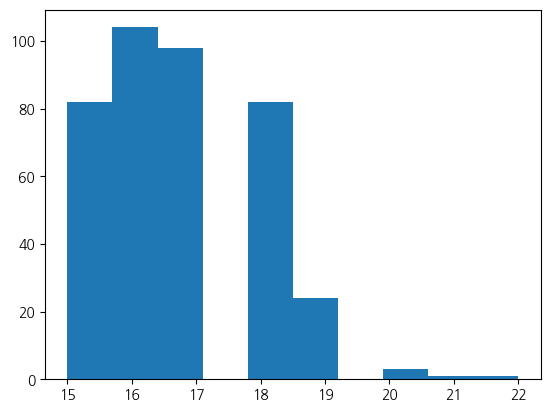

In [2]:
plt.hist(df["age"]) # 꿇었구나.... 

In [3]:
#df.info() # target이 성적이므로, 모든 요소 하나하나가 다 영향이 있다...

In [4]:
# 모든 데이터를 정수로 변환
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
for i in df.columns:
    if df[i].dtype == "object": # 컬럼의 타입이 "Object"이면,
        df[i] = le.fit_transform(df[i]) # LabelEncoder로 문자열을 숫자로 변환
#df.info() # 모두 숫자로 변환되었음 => 다만, 0으로 낮게 나오는 경우가 있으니, 이를 특정 값으로 대체하여야만 함

In [5]:
#별 짓을 해도 안되니, 내 생각대로 내 컬럼을 만들꺼다...
# => Medu * Fedu : 값이 높을수록 좋다 
# => reason * famrel : 학교를 선택한 이유가 학교 평판과 과정이면 높은 점수, 가족관계가 좋으면 높은 점수
# => Dalc * Walc : 음주가 적을수록 좋다
# => goout * freetime : 외출과 자유시간이 많을수록 좋다

df["Parent_level"]=df["Medu"]*df["Fedu"]
df["Reputation"]=df["reason"]*df["famrel"]^2 
df["Bear"]=df["Dalc"]*df["Walc"]
df["freedom"]=df["goout"]*df["freetime"]

# => 잠깐...LabelEncoder말고 내가 직접 하자....

In [6]:
df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,Parent_level,Reputation,Bear,freedom
0,0,0,18,1,0,0,4,4,0,4,...,1,3,6,5,6,6,16,2,1,12
1,0,0,17,1,0,1,1,1,0,2,...,1,3,4,5,5,6,1,2,1,9
2,0,0,15,1,1,1,1,1,0,2,...,3,3,10,7,8,10,1,10,6,6
3,0,0,15,1,0,1,4,2,1,3,...,1,5,2,15,14,15,8,1,1,4
4,0,0,16,1,0,1,3,3,2,2,...,2,5,4,6,10,10,9,6,2,6
5,0,1,16,1,1,1,4,3,3,2,...,2,5,10,15,15,15,12,13,2,8
6,0,1,16,1,1,1,2,2,2,2,...,1,3,0,12,12,11,4,6,1,16
7,0,0,17,1,0,0,4,4,2,4,...,1,1,6,6,5,6,16,6,1,4
8,0,1,15,1,1,0,3,2,3,2,...,1,1,0,16,18,19,6,6,1,4
9,0,1,15,1,0,1,3,4,2,2,...,1,5,0,14,15,15,12,7,1,5


In [7]:
for i in df.columns: # 0,1의 이진 값을 +-값을 주어 극대화시킴 
    if len(df[i].unique())==2:
        df[i].replace({0:-5, 1:5})

In [8]:
# 다중공산성(multicollinearity)을 없애기 위해, 상관계수가 강한 컬럼 제거
from statsmodels.stats.outliers_influence import variance_inflation_factor


# 독립 변수들의 데이터프레임 넣기
X = df[df.columns[:-3]]

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# VIF 출력 : 10이 넘는 변수들은 다중공산성이 심한 독립변수들 => 제거하여 마땅하도다.... 
VIF_result=vif_data[vif_data["VIF"] > 50]
VIF_result

,Variable,VIF
2,age,109.602726
6,Medu,56.861890
7,Fedu,66.296051
30,G1,52.225719
31,G2,74.527531
33,Parent_level,77.019677


In [9]:
# 해당 컬럼을 제거 => 다중공산성 문제 해결! 
df.drop(VIF_result["Variable"], axis=1, inplace=True)

In [10]:
# 중복 데이터 확인 => 한개도 없다 : 그냥 써도 좋은 아주 훌륭한 데이터! 
#df.duplicated().sum()

In [11]:
# 이상값 제거
import scipy.stats as stats 
z = np.abs(stats.zscore(df)) 
index,_=np.where(z>3)

In [12]:
# 이상치를 심하게 웃도는 데이터 제거 
df.drop(index, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [13]:
df.columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G3', 'Reputation', 'Bear', 'freedom'],
      dtype='object')

In [14]:
"+".join(df.columns[:-4])

'school+sex+address+famsize+Pstatus+Mjob+Fjob+reason+guardian+traveltime+studytime+failures+schoolsup+famsup+paid+activities+nursery+higher+internet+romantic+famrel+freetime+goout+Dalc+Walc+health+absences'

In [15]:
# ols 분석 시행하여 유의미한 변수를 찾음
import statsmodels.formula.api as smf 
formula = f'G3 ~ {"+".join(df.columns[:-4])}'
result = smf.ols(formula, df).fit()
result.summary()
# Adj.R-squared : 0.214 -> 최악이다....
# Log-Likelihood(우도)가 낮고, AIC, BIC 값이 크다 : 예측이 힘들다
# Skew : 데이터는 정규분포에 가까움 
# Kurtosis : 3과 근사하므로, 정규분포와 유사한 형태를 띄고 있음
# Cond. No. : 다중공산성은 낮은 편 -> 이건 좋다! 

# ==> 즉, P-value가 0.1(유의수준)보다 낮고, 높은 선형성의 관계를 갖는 값
# reason, traveltime, failures, schoolsup, absences

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     3.394
Date:                Mon, 04 Mar 2024   Prob (F-statistic):           1.68e-07
Time:                        09:24:51   Log-Likelihood:                -946.33
No. Observations:                 339   AIC:                             1947.
Df Residuals:                     312   BIC:                             2050.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7946      1.153      4.159      0.000       2.526       7.063
school         0.3403      0.825      0.413      0.680      -1.282       1.963
sex            1.4133      0.521      2.714      0.007       0.389       2.438
address        0.7238      0.621      1.166      0.245      -0.498       1.945
famsize        0.4899      0.519      0.944      0.346      -0.531       1.511
Pstatus       -0.6634      0.783     -0.848      0.397      -2.203       0.877
Mjob          -0.1152      0.207     -0.556      0.579      -0.523       0.293
Fjob           0.4530      0.268      1.691      0.092      -0.074       0.980
reason         0.4604      0.191      2.409      0.017       0.084       0.837
guardian      -0.0635      0.446     -0.143      0.887      -0.941       0.813
traveltime    -0.7308      0.414     -1.766      0.078      -1.545       0.084
studytime      0.3836      0.297      1.291      0.198      -0.201       0.968
failures      -2.4213      0.497     -4.874      0.000      -3.399      -1.444
schoolsup     -1.2385      0.689     -1.798      0.073      -2.594       0.117
famsup        -0.7202      0.505     -1.425      0.155      -1.715       0.274
paid           0.1661      0.503      0.330      0.742      -0.824       1.157
activities    -0.4782      0.479     -0.999      0.318      -1.420       0.463
nursery        0.4691      0.589      0.797      0.426      -0.690       1.628
higher         4.7946      1.153      4.159      0.000       2.526       7.063
internet       0.9897      0.655      1.512      0.132      -0.298       2.278
romantic      -0.7971      0.519     -1.536      0.125      -1.818       0.224
famrel         0.1170      0.297      0.394      0.694      -0.468       0.702
freetime       0.2284      0.250      0.915      0.361      -0.263       0.720
goout         -0.5229      0.245     -2.135      0.034      -1.005      -0.041
Dalc          -0.1575      0.428     -0.368      0.713      -1.000       0.685
Walc          -0.0825      0.264     -0.313      0.755      -0.601       0.436
health         0.0008      0.171      0.005      0.996      -0.336       0.337
absences       0.0915      0.043      2.113      0.035       0.006       0.177
==============================================================================
Omnibus:                       21.745   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.119
Skew:                          -0.612   Prob(JB):                     5.79e-06
Kurtosis:                       3.457   Cond. No.                     3.92e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.52e-29. This might indicate

In [16]:
np.abs(df.corr()["G3"]).sort_values() # 상관계수 값이 낮으므로, 그나마 높을 걸 뽑는다
# ols => reason, traveltime, failures, schoolsup, absences      
# corr => sex, traveltime, failures    
# 최종적 : traveltime, failures, + sex, reason으로 feature 결정

activities    0.022752
health        0.023952
freetime      0.031608
paid          0.035131
absences      0.035728
studytime     0.041778
freedom       0.050468
Bear          0.052562
Walc          0.053480
Pstatus       0.055857
school        0.056143
guardian      0.060695
Dalc          0.063292
famsize       0.070622
famrel        0.070942
famsup        0.075115
Fjob          0.075560
nursery       0.079252
Mjob          0.087757
reason        0.107940
goout         0.108168
internet      0.109191
address       0.119184
schoolsup     0.119656
romantic      0.121598
Reputation    0.128341
traveltime    0.143283
sex           0.163893
failures      0.309576
G3            1.000000
higher             NaN
Name: G3, dtype: float64

In [17]:
# 최종적 : traveltime, failures, + sex, reason으로 feature 결정
from sklearn.model_selection import train_test_split 
feature=df[["traveltime","failures","Reputation"]]
target=df["G3"]

In [18]:
from sklearn.preprocessing import PolynomialFeatures # 열 추가 방법 시도....1


poly = PolynomialFeatures(degree=2, include_bias=False) # PolyFeatures 객체 생성
df2=pd.DataFrame(poly.fit_transform(feature), columns=poly.get_feature_names_out()) # DataFrame으로 변환
df = pd.concat([target,df2],axis=1) # DataFrame 병합 

In [19]:
# from sklearn.preprocessing import FunctionTransformer # 열 추가 방법 시도....2

# def custom_function(X):
#     return np.column_stack((X, np.sin(X), np.cos(X)))

# poly = FunctionTransformer(func=custom_function)
# df2=pd.DataFrame(poly.fit_transform(feature)) # DataFrame으로 변환
# df = pd.concat([target,df2],axis=1) # DataFrame 병합 

In [20]:
x_train, x_test, y_train, y_test = train_test_split(feature, 
                                                    target, 
                                                    test_size=0.2)

In [21]:
from sklearn.preprocessing import StandardScaler     
from sklearn.preprocessing import MinMaxScaler     
from sklearn.preprocessing import RobustScaler     
from sklearn.preprocessing import SplineTransformer     
from sklearn.preprocessing import QuantileTransformer   

std_s=StandardScaler()
x_train_std=std_s.fit_transform(x_train)
std_s=StandardScaler()
x_test_std=std_s.fit_transform(x_test)

mm_s=MinMaxScaler()
x_train_mm=mm_s.fit_transform(x_train)
mm_s=MinMaxScaler()
x_test_mm=mm_s.fit_transform(x_test)

ro_s=RobustScaler()
x_train_ro=ro_s.fit_transform(x_train)
ro_s=RobustScaler()
x_test_ro=ro_s.fit_transform(x_test)

sq_s=SplineTransformer()
x_train_sq=sq_s.fit_transform(x_train)
sq_s=SplineTransformer()
x_test_sq=sq_s.fit_transform(x_test)

qt_s=QuantileTransformer(n_quantiles=100)
x_train_qt=qt_s.fit_transform(x_train)
qt_s=QuantileTransformer(n_quantiles=100)
x_test_qt=qt_s.fit_transform(x_test)



c:\ProgramData\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\preprocessing\_data.py:2667: UserWarning: n_quantiles (100) is greater than the total number of samples (68). n_quantiles is set to n_samples.
  warnings.warn(


In [22]:
x_data=[x_train_std,x_test_std,x_train_mm,x_test_mm,x_train_ro,x_test_ro,x_train_sq,x_test_sq,x_train_qt,x_test_qt]
len(x_data) # 2X5=10개의 X 데이터 셋 마련 

10

In [23]:
from sklearn.neighbors import KNeighborsClassifier         
from sklearn.ensemble import RandomForestRegressor     
from sklearn.svm import SVR     
from sklearn.linear_model import LogisticRegression     
from sklearn.neighbors import KNeighborsRegressor     
from sklearn.linear_model import LinearRegression        
from sklearn.multiclass import OneVsRestClassifier     
from sklearn.multiclass import OneVsOneClassifier        
from sklearn.metrics import mean_squared_error     
from sklearn.metrics import mean_absolute_error     
from sklearn.metrics import r2_score       
from sklearn.metrics import accuracy_score     
from sklearn.metrics import precision_score     
from sklearn.metrics import recall_score     
from sklearn.metrics import f1_score     
from sklearn.metrics import confusion_matrix     
from sklearn.metrics import classification_report 

model_list=[KNeighborsClassifier(), 
            LogisticRegression(), # 여기까지는 분류 측정 지표 계산 가능
            RandomForestRegressor(),
            SVR(),
            KNeighborsRegressor(),
            LinearRegression()] 
#OvO_list=[OneVsRestClassifier(),OneVsOneClassifier()]

score_dict=dict()
for j in range(len(model_list)):
    for i in range(0,10,2) :
        model=model_list[j]
        model.fit(x_data[i], y_train)
        train_score=model.score(x_data[i], y_train)                # (1) train_score  
        test_score=model.score(x_data[i+1], y_test)                # (2) test_score  
        
        y_pre=model.predict(x_data[i+1])
        rmse=mean_squared_error(y_test, y_pre, squared=False)      # (3) RMSE  
        mse=mean_squared_error(y_test, y_pre, squared=True)        # (4) MSE  
        r2=r2_score(y_test, y_pre)                                 # (5) R^2  
        mae=mean_absolute_error(y_test, y_pre)                     # (6) mae 
        
        if j in [0,1] :
            cr=classification_report(y_test, y_pre, zero_division=1)   # (7) classification_report
            f1=f1_score(y_test, y_pre, average='weighted', zero_division=1)             # (8) f1 
            recall=recall_score(y_test, y_pre, average='micro', zero_division=1)        # (9) recall
            cm=confusion_matrix(y_test, y_pre)                         # (10) confusion_matrix
            accuracy=accuracy_score(y_test, y_pre)                     # (11) accuracy
            precision=precision_score(y_test, y_pre, average='macro', zero_division=1)  # (12) precision

            score_dict.setdefault(j,[train_score, test_score, rmse,mse,r2,mae,cr,f1,recall,cm,accuracy,precision])
        else :
            score_dict.setdefault(j,[train_score, test_score, rmse,mse,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan])

In [24]:
score_df=pd.DataFrame(score_dict, index=['train_score','test_score','RMSE','MSE','R^2','MAE','classification_report','f1','recall','confusion_matrix','accuracy','precision'])
score_df.columns=["KNeighborsClassifier","LogisticRegression","RandomForestRegressor","SVR","KNeighborsRegressor","LinearRegression"]
score_df.loc["test_score"] # 13....?

# 일단 KNeiborsClassifier과, LogisticRegression이 높게 나왔다
# 해당 코드 파일을 통해서, 튜닝할 모델을 골랐으니, 다시 정확도를 높여보자! 

KNeighborsClassifier     0.102941
LogisticRegression       0.132353
RandomForestRegressor   -0.153725
SVR                      0.012859
KNeighborsRegressor     -0.225404
LinearRegression         0.057802
Name: test_score, dtype: object

In [25]:
#별 짓을 해도 안되니, 내 생각대로 내 컬럼을 만들꺼다...
# 4. address 주소 -> U(도시), R(농촌)
# 5. famsize 가족 크기
# 6. Pstatus 부모의 동거 여부 ->  T:동거 A:동거 X


# 7. Medu 어머니의 교육 -> 0:없음 1:초등교육(4학년) 2:5-9학년 3:중등교육 4:고등교육
# 8. Fedu 아버지의 교육 -> 0:없음 1:초등교육(4학년) 2:5-9학년 3:중등교육 4:고등교육
#=> Medu + Fedu 를 합치자

# 9. Mjob 어머니의 직업 -> nominal(교사,건강관리 관련), services(행정,경찰)
# 10. Fjob 아버지의 직업 -> nominal(교사,건강관리 관련), services(행정,경찰)

# 11. reason 본 학교를 선택한 이유 -> 집에 가까운, 학교 평판, 과정, 선호, 기타
# 12. guardian 학생의 보호자 -> mother, father, 기타

# 13. traveltime 이동 시간 -> 15분 이상 -> yes , no

# 14. studytime 학습 시간 -> 1:2시간이하 2:2-5시간 3:5-10시간 4:10시간이상
# 15. failures 낙제 횟수 -> 1,2,3 or 4(1,2,3 아니면 4)
# 16. schoolsup 추가교육(보충수업?)
# 17. famsup 가족 교육 지원
# 18. paid 수학 공부 추가 지원 여부
# 19. activities 과외 활동
# 20. nursery 보육원
# 21. higher 고등교육 희망 유무
# 22. internet 인터넷 접속
# 23. romantic 이성교제
# 24. famrel 가족관계 -> 1:매우나쁨 2:나쁨 3:보통 4:좋음 5:매우좋음
# 25. freetime 자유시간 -> 1:매우적음 2:적음 3:보통 4:많음 5:매우많음
# 26. goout 외출 -> 1:매우적음 2:적음 3:보통 4:많음 5:매우많음
# 27. Dalc 일과 중 음주 -> 1:매우적음 2:적음 3:보통 4:많음 5:매우많음
# 28. Walc 주말 음주 -> 1:매우적음 2:적음 3:보통 4:많음 5:매우많음
# 29. health 현재 건강 상태 -> 1:매우나쁨 2:나쁨 3:보통 4:좋음 5:매우좋음


# => reason + famrel
# => Dalc + Walc 
# => goout + freetime